In [ ]:
###Ml-assignment3-fractal3-Chart Image Classification using CNN-m22ai608###

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

In [9]:
# Define the paths to your image and csv folders
train_val_dir = "C:\\Users\\Admin\\Downloads\\train_val"
test_dir = "C:\\Users\\Admin\\Downloads\\test"


In [11]:
train_val_labels = pd.read_csv("C:\\Users\\Admin\\Downloads\\train_val.csv")

In [12]:
train_val_labels

,image_index,type
0,0,vbar_categorical
1,1,vbar_categorical
2,2,vbar_categorical
3,3,vbar_categorical
4,4,vbar_categorical
...,...,...
995,995,dot_line
996,996,dot_line
997,997,dot_line
998,998,dot_line


In [20]:
#loading training dataset into numpy array
images=[]
labels=[]

for filename in os.listdir(train_val_dir):
    if filename.endswith('.png'):
        # Load the images and resize them to (128, 128) with 3 color channels
        img=cv2.imread(os.path.join(train_val_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #img = Image.open(os.path.join(train_val_dir, filename))
        img_array = np.array(img)
        # Append the array to the list of images
        images.append(img_array)
        labels.append(filename)



        

In [21]:
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

In [22]:
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy') 
y_train = np.load('y_train.npy') 


In [23]:
x_train.shape

(1000, 128, 128, 3)

In [24]:
x_train[:5]
y_train[:5]


array([0, 1, 2, 3, 4], dtype=int64)

In [27]:
# load test dataset in numpy array
images = []
labels = []
for filename in os.listdir(test_dir):
	if filename.endswith('.png'):
		# Load the images and resize them to (128, 128) with 3 color channels
		img = cv2.imread(os.path.join(test_dir, filename))
		img = cv2.resize(img, (128, 128))
		img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
		# img = Image.open(os.path.join(test_dir, filename))
		img_array = np.array(img)
		# Append the array to the list of images
		images.append(img_array)
		labels.append(filename)
        
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)


In [28]:
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)
x_test = np.load('x_test.npy') 
y_test = np.load('y_test.npy') 

In [29]:
x_test.shape

(50, 128, 128, 3)

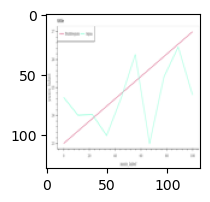

In [30]:
# check the images loaded
plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])


In [31]:
# define some classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]
# map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])
y_train
y_train.shape
y_test.shape


(50,)

In [32]:
# we need to map the lables from csv to the images somehow
# function to test the chart sample
def image_sample(x, y, index):
 plt.figure(figsize = (10,2))
 plt.imshow(x[index])
# image_label = train_val_labels.iloc[index]['type']
# plt.xlabel(image_label)
 plt.xlabel(image_classes[y[index]])

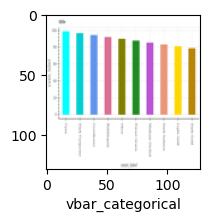

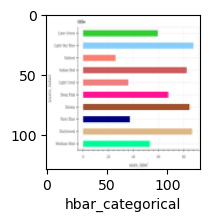

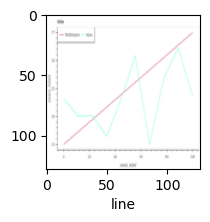

In [33]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208)
image_sample(x_train,y_train,444)


In [34]:
# now we have mapped the corresponding labels to the image

In [35]:
# normalize the image
# x_train[0]/255
x_train=x_train /255
x_test=x_train /255

In [36]:
x_test.shape

(1000, 128, 128, 3)

In [37]:
# take the label for train data from csv file
y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

In [38]:
y_train_type[:5]


0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [39]:
# writing a simple nn to test first
# Define the model architecture
model = Sequential([
 Flatten(input_shape=(128,128,3)),
 Dense(3000, activation='relu'),
 Dense(1000, activation='relu'),
 Dense(5, activation='softmax')
])
# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)


Epoch 1/10
32/32 [==============================] - 45s 1s/step - loss: 6.7311 - accuracy: 0.2040
Epoch 2/10
32/32 [==============================] - 34s 1s/step - loss: 1.6313 - accuracy: 0.2010
Epoch 3/10
32/32 [==============================] - 34s 1s/step - loss: 1.6286 - accuracy: 0.1830
Epoch 4/10
32/32 [==============================] - 34s 1s/step - loss: 1.6092 - accuracy: 0.2150
Epoch 5/10
32/32 [==============================] - 33s 1s/step - loss: 1.5919 - accuracy: 0.2640
Epoch 6/10
32/32 [==============================] - 35s 1s/step - loss: 1.5928 - accuracy: 0.2390
Epoch 7/10
32/32 [==============================] - 37s 1s/step - loss: 1.6085 - accuracy: 0.2010
Epoch 8/10
32/32 [==============================] - 35s 1s/step - loss: 1.6090 - accuracy: 0.2010
Epoch 9/10
32/32 [==============================] - 35s 1s/step - loss: 1.5973 - accuracy: 0.2470
Epoch 10/10
32/32 [==============================] - 35s 1s/step - loss: 1.5715 - accuracy: 0.2770


In [40]:

# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [41]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 3s 215ms/step - loss: 1.6074 - accuracy: 0.1900


[1.607377052307129, 0.1899999976158142]

In [42]:

y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]
# print("classificaton report : \n",classification_report(y_test,y_pred_classes))

7/7 [==============================] - 2s 216ms/step


In [43]:
# here we see the accuracy is very low and we need to modify our nn to add more layers for better accuracy

In [48]:
# Print the shapes of the arrays to verify that they loaded correctly
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)


Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


Epoch 1/50
1/1 [==============================] - 19s 19s/step - loss: 1.6135 - accuracy: 0.2000 - val_loss: 1.6425 - val_accuracy: 0.3200
Epoch 2/50
1/1 [==============================] - 9s 9s/step - loss: 1.6793 - accuracy: 0.2975 - val_loss: 1.6415 - val_accuracy: 0.1650
Epoch 3/50
1/1 [==============================] - 9s 9s/step - loss: 1.5932 - accuracy: 0.2087 - val_loss: 1.5868 - val_accuracy: 0.1650
Epoch 4/50
1/1 [==============================] - 9s 9s/step - loss: 1.5502 - accuracy: 0.2113 - val_loss: 1.5339 - val_accuracy: 0.3650
Epoch 5/50
1/1 [==============================] - 8s 8s/step - loss: 1.5115 - accuracy: 0.4563 - val_loss: 1.4817 - val_accuracy: 0.4250
Epoch 6/50
1/1 [==============================] - 9s 9s/step - loss: 1.4668 - accuracy: 0.4588 - val_loss: 1.4286 - val_accuracy: 0.5500
Epoch 7/50
1/1 [==============================] - 8s 8s/step - loss: 1.4141 - accuracy: 0.5387 - val_loss: 1.3574 - val_accuracy: 0.5950
Epoch 8/50
1/1 [=======================

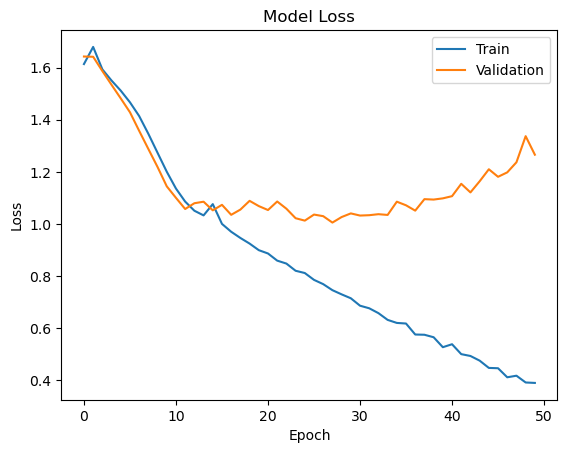

In [45]:
# modify the model architecture to cmnn
cnn_model = Sequential([
 Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(32, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)), 
 Flatten(),
 Dense(128, activation='relu'),
 Dense(5, activation='softmax')
])
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))
# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


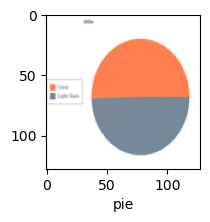

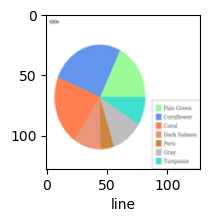

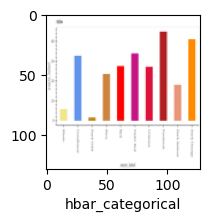

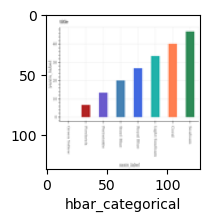

In [46]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)


In [47]:
# Observation: we can see some wrong predictions

In [49]:
y_pred = cnn_model.predict(x_test)
y_pred[:5]


7/7 [==============================] - 0s 44ms/step


array([[5.9100533e-01, 9.2610933e-02, 2.5525376e-01, 7.6767565e-03,
        5.3453166e-02],
       [3.6238769e-01, 2.7055554e-03, 4.7208389e-04, 2.6975430e-03,
        6.3173705e-01],
       [2.4078129e-01, 8.8157115e-04, 3.7447677e-04, 1.3594921e-03,
        7.5660318e-01],
       [8.6859560e-01, 3.6240245e-08, 6.7258077e-03, 5.3803790e-03,
        1.1929820e-01],
       [6.7858952e-01, 2.0210763e-02, 2.7697051e-01, 2.9671979e-03,
        2.1262055e-02]], dtype=float32)

In [50]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 4, 4, 0, 0]

In [51]:
y_test[:5]

array([0, 4, 4, 4, 0])

In [52]:
# here we see some values are not matching

'dot_line'

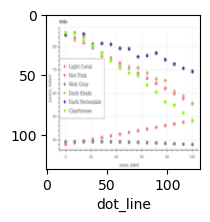

In [53]:
# test actual and predicted
# image_sample(x_test,y_test,1) #actual
# image_classes[y_classes[1]] #predicted
# image_sample(x_test,y_test,10) #actual
# image_classes[y_classes[10]] #predicted
image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]] #predicted

In [54]:
# some values are not matching

In [55]:
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.52      0.59      0.56        37
           1       0.88      0.84      0.86        44
           2       0.67      0.62      0.65        48
           3       0.55      0.48      0.52        33
           4       0.64      0.71      0.67        38

    accuracy                           0.66       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.66      0.66      0.66       200



In [56]:
# Generate the confusion matrix 
conf_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_mat)


Confusion Matrix:
[[22  2  2  3  8]
 [ 5 37  0  1  1]
 [ 8  1 30  7  2]
 [ 0  2 11 16  4]
 [ 7  0  2  2 27]]


Text(95.72222222222221, 0.5, 'Actual')

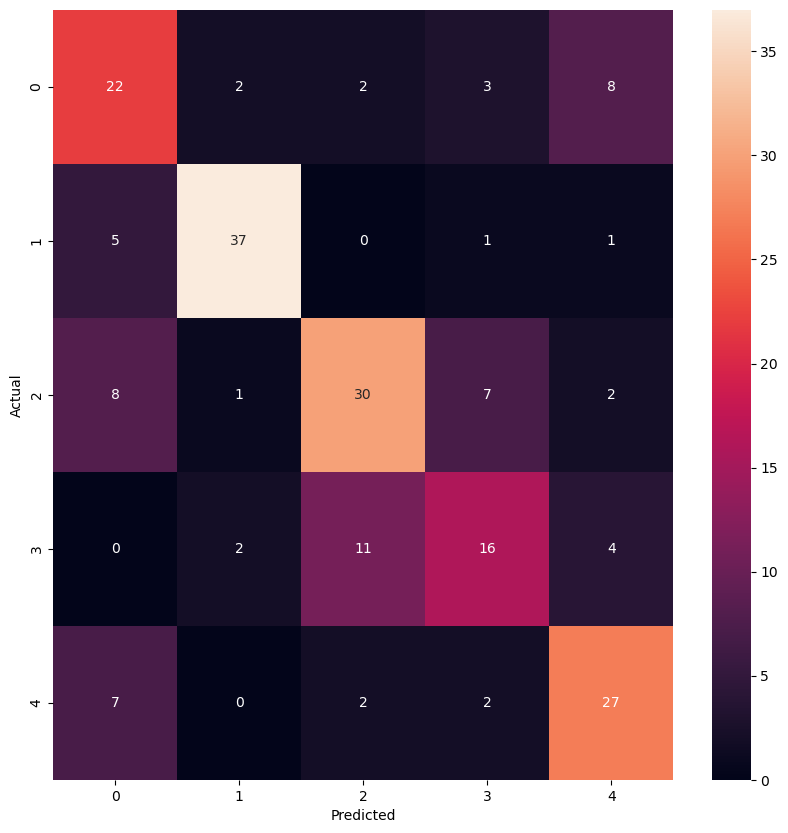

In [57]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [58]:
# for 50 iterations, we can see some promising accuracy, more training will be required for better accuracy
# in the confusion matrix, whatever is not in diagonal is a error

In [59]:

from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 15s 0us/step


In [60]:

# Replace the final classification layer with a new layer
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)


In [61]:

# Freeze the weights of all layers except the new classification layer
for layer in pt_model.layers:
 layer.trainable = False


In [62]:

# Compile the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [63]:

# Print the summary of the model architecture
pt_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [64]:

# Set up data generators for image augmentation and feeding data to the model
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=20,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)


In [65]:

# flow method generates batches of augmented data
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
test_generator = train_datagen.flow(x_test, y_test, batch_size=32)